## Exploratory Data Analysis

In [204]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
pd.set_option('display.max_colwidth', 200)

In [208]:
filename = 'complaints.csv'
try:
    df = pd.read_csv(filename, nrows=100000)
    print(f"Successfully loaded {len(df)} rows from {filename}.")
except FileNotFoundError:
    print(f"ERROR: File '{filename}' not found.")
    print("Please make sure the unzipped CSV is in the same folder as this notebook.")
    raise

Successfully loaded 100000 rows from complaints.csv.


In [210]:
df.describe(include='all')

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,100000,100000,99734,100000,97972,6868,12060,100000,99820,99960,2494,17945,100000,100000,100000,100000,807,1.000000e+05
unique,3093,19,75,138,237,5850,10,1096,60,10975,3,4,5,3052,8,2,2,NaN
top,2025-10-08,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information belongs to someone else,"You have reported inaccurate and unauthorized accounts on my credit report, which is a violation of the Fair Credit Reporting Act ( 15 U.S. Code 1681i ) requiring a proper reinvestigation of dispu...",Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,XXXXX,Servicemember,Consent not provided,Web,2025-10-08,In progress,Yes,No,NaN
freq,2782,86393,88491,51939,35178,77,11257,30225,14877,1432,1695,10276,98901,2807,75250,99716,642,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.551138e+07
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.865695e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.302000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.610254e+07
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.638082e+07
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.665005e+07


In [212]:
df.sample()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
22169,2025-10-16,Debt collection,Credit card debt,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Experian Information Solutions Inc.,TN,38115,NaN,NaN,Web,2025-10-16,In progress,Yes,NaN,16635694


In [214]:
df.shape

(100000, 18)

In [216]:
df.info

<bound method DataFrame.info of       Date received  \
0        2020-07-06   
1        2025-10-06   
2        2025-10-14   
3        2025-10-26   
4        2025-10-10   
...             ...   
99995    2025-10-15   
99996    2025-09-29   
99997    2025-10-21   
99998    2025-10-16   
99999    2014-06-16   

                                                                            Product  \
0      Credit reporting, credit repair services, or other personal consumer reports   
1                               Credit reporting or other personal consumer reports   
2                               Credit reporting or other personal consumer reports   
3                               Credit reporting or other personal consumer reports   
4                               Credit reporting or other personal consumer reports   
...                                                                             ...   
99995                           Credit reporting or other personal consumer report

In [218]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [220]:
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [222]:
df.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2020-07-06,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,Experian Information Solutions Inc.,FL,346XX,NaN,Other,Web,2020-07-06,Closed with explanation,Yes,NaN,3730948
1,2025-10-06,Credit reporting or other personal consumer reports,Credit reporting,Problem with a company's investigation into an existing problem,Investigation took more than 30 days,NaN,NaN,Experian Information Solutions Inc.,TX,75454,NaN,NaN,Web,2025-10-06,In progress,Yes,NaN,16372503
2,2025-10-14,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information is missing that should be on the report,NaN,NaN,"EQUIFAX, INC.",TX,75062,NaN,NaN,Web,2025-10-14,In progress,Yes,NaN,16558024
3,2025-10-26,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,93619,NaN,NaN,Web,2025-10-26,In progress,Yes,NaN,16826857
4,2025-10-10,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30341,NaN,NaN,Web,2025-10-10,In progress,Yes,NaN,16507707


In [224]:
df.tail(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
99995,2025-10-15,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",VA,23601,NaN,NaN,Web,2025-10-15,In progress,Yes,NaN,16600333
99996,2025-09-29,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,NY,10603,NaN,NaN,Web,2025-09-29,In progress,Yes,NaN,16255132
99997,2025-10-21,Credit reporting or other personal consumer reports,Credit reporting,Problem with a company's investigation into an existing problem,Their investigation did not fix an error on your report,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77583,NaN,NaN,Web,2025-10-21,In progress,Yes,NaN,16690524
99998,2025-10-16,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",NY,114XX,NaN,NaN,Web,2025-10-16,In progress,Yes,NaN,16626249
99999,2014-06-16,Student loan,Non-federal student loan,Dealing with my lender or servicer,Keep getting calls about my loan,NaN,NaN,"Navient Solutions, LLC.",CA,92354,NaN,NaN,Web,2014-06-16,Closed with explanation,Yes,No,896314


In [226]:
# Missing values
df.isnull().sum()
(df.isnull().sum()/len(df))*100  

Date received                    0.000
Product                          0.000
Sub-product                      0.266
Issue                            0.000
Sub-issue                        2.028
Consumer complaint narrative    93.132
Company public response         87.940
Company                          0.000
State                            0.180
ZIP code                         0.040
Tags                            97.506
Consumer consent provided?      82.055
Submitted via                    0.000
Date sent to company             0.000
Company response to consumer     0.000
Timely response?                 0.000
Consumer disputed?              99.193
Complaint ID                     0.000
dtype: float64

In [228]:
# Duplicate values
df.duplicated().sum()

0

# Univariate Analysis

In [231]:
df['Product'].value_counts().head(10)
df['Issue'].value_counts().head(10)
df['Company'].value_counts().head(10)
df['State'].value_counts().head(10)
df['Submitted via'].value_counts()

Submitted via
Web            98901
Referral         429
Phone            411
Postal mail      225
Fax               34
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Products')

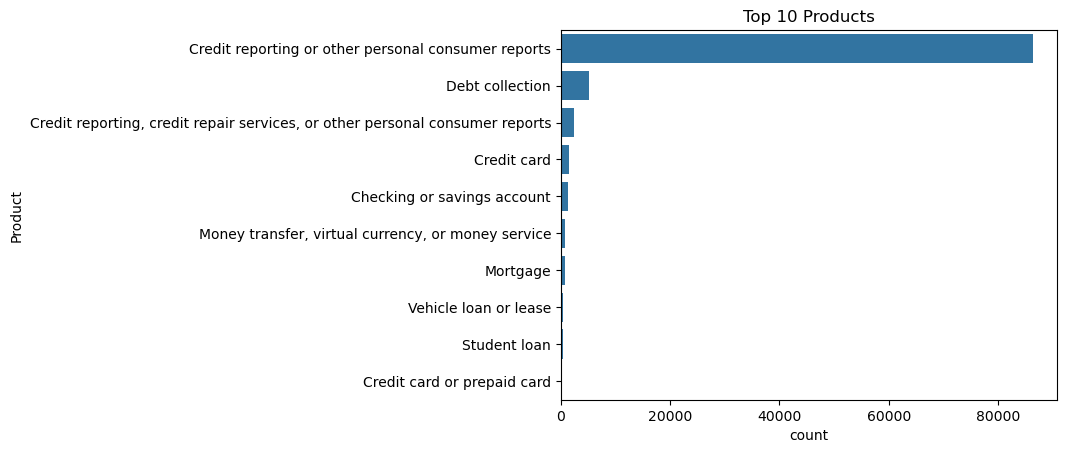

In [233]:
sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index[:10])
plt.title('Top 10 Products')

In [235]:
# Boolean columns
df['Timely response?'].value_counts(normalize=True)
df['Consumer disputed?'].value_counts(normalize=True)

Consumer disputed?
No     0.795539
Yes    0.204461
Name: proportion, dtype: float64

# Bivariate Analysis

In [238]:
# Product vs Issue
pd.crosstab(df['Product'], df['Issue'])

Issue,APR or interest rate,"Account opening, closing, or management",Advertising,Advertising and marketing,"Advertising and marketing, including promotional offers","Application, originator, mortgage broker",Applying for a mortgage or refinancing an existing mortgage,Attempts to collect debt not owed,Balance transfer,Balance transfer fee,...,Unauthorized transactions or other transaction problem,Unauthorized transactions/trans. issues,Unauthorized withdrawals or charges,Unexpected fees,Unexpected or other fees,Unsolicited issuance of credit card,Using a debit or ATM card,Vehicle was repossessed or sold the vehicle,Written notification about debt,Wrong amount charged or received
Product,,,,,,,,,,,,,,,,,,,,,
Bank account or service,0,39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,0,0,0
Checking or savings account,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Consumer Loan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Credit card,3,0,0,4,57,0,0,0,2,1,...,0,0,0,0,0,2,0,0,0,0
Credit card or prepaid card,0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
Credit reporting,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Credit reporting or other personal consumer reports,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Credit reporting, credit repair services, or other personal consumer reports",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Debt collection,0,0,0,0,0,0,0,1857,0,0,...,0,0,0,0,0,0,0,0,1168,0


<Axes: xlabel='Timely response?', ylabel='count'>

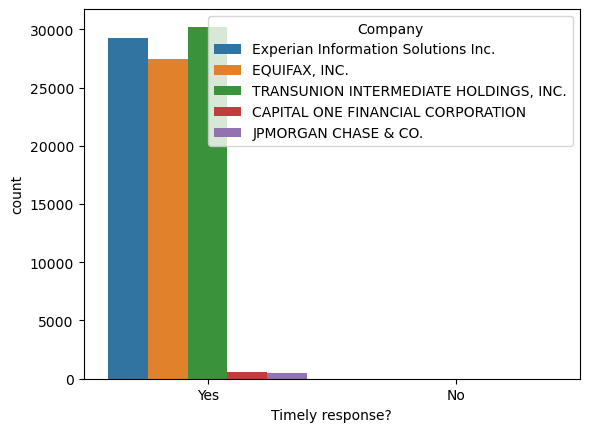

In [240]:
# Company vs Timely Response
sns.countplot(x='Timely response?', hue='Company', data=df[df['Company'].isin(df['Company'].value_counts().index[:5])])

<Axes: xlabel='Submitted via', ylabel='count'>

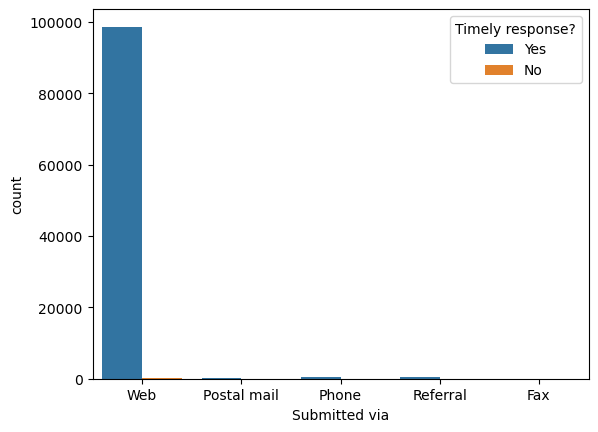

In [242]:
# Submitted via vs Timely Response
sns.countplot(x='Submitted via', hue='Timely response?', data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Credit reporting, credit repair services, or other personal consumer reports'),
  Text(1, 0, 'Credit reporting or other personal consumer reports'),
  Text(2, 0, 'Debt collection'),
  Text(3, 0, 'Money transfer, virtual currency, or money service'),
  Text(4, 0, 'Credit card'),
  Text(5, 0, 'Credit card or prepaid card'),
  Text(6, 0, 'Checking or savings account'),
  Text(7, 0, 'Mortgage'),
  Text(8, 0, 'Payday loan, title loan, personal loan, or advance loan'),
  Text(9, 0, 'Prepaid card'),
  Text(10, 0, 'Debt or credit management'),
  Text(11, 0, 'Vehicle loan or lease'),
  Text(12, 0, 'Student loan'),
  Text(13, 0, 'Payday loan, title loan, or personal loan'),
  Text(14, 0, 'Bank account or service'),
  Text(15, 0, 'Credit reporting'),
  Text(16, 0, 'Consumer Loan'),
  Text(17, 0, 'Payday loan'),
  Text(18, 0, 'Money transfers')])

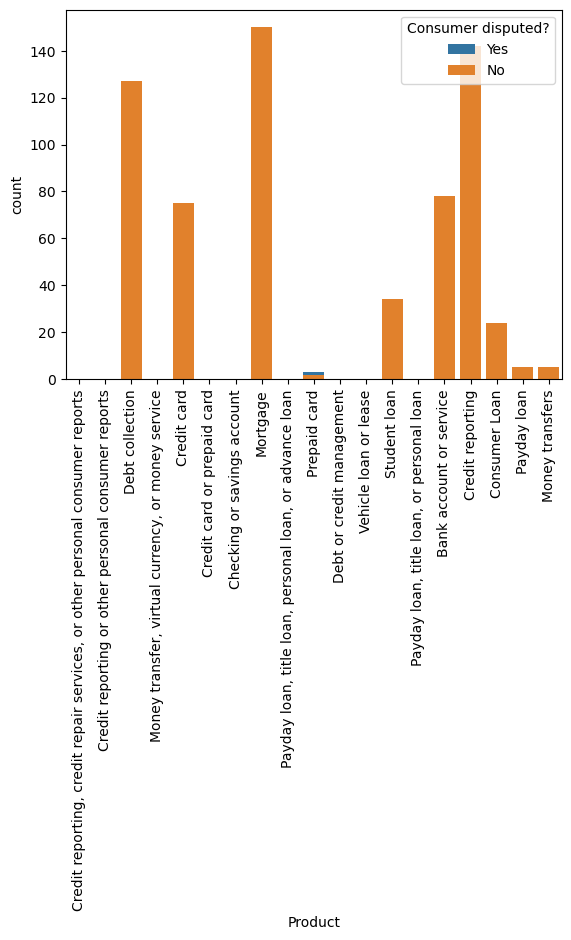

In [244]:
# Consumer disputed vs Product
sns.countplot(x='Product', hue='Consumer disputed?', data=df)
plt.xticks(rotation=90)

In [246]:
df['Date received'].dtype

dtype('O')

Text(0.5, 1.0, 'Top 10 States by Complaint Volume')

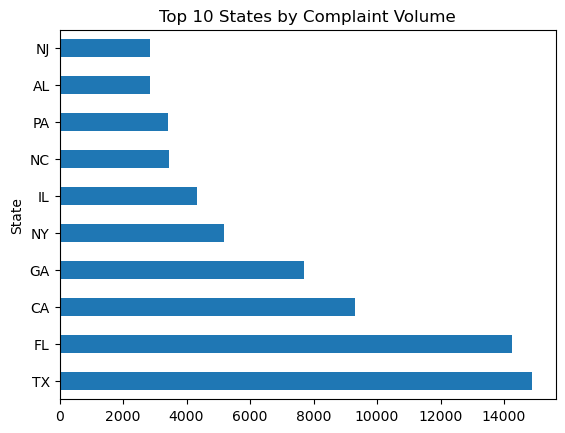

In [248]:
# Plotting top 10 states by complaints
df['State'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 States by Complaint Volume')

<Axes: xlabel='narrative_length', ylabel='Count'>

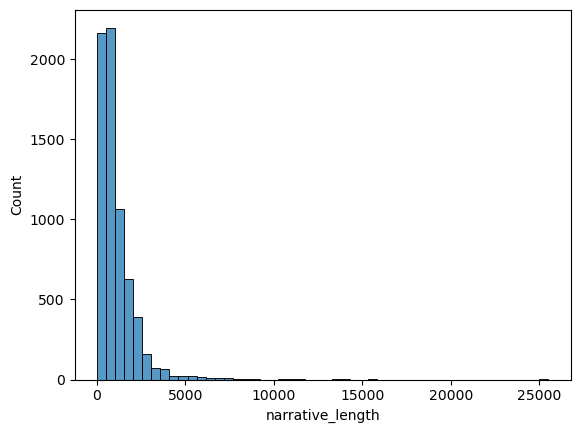

In [250]:
# Histogram of narrative length
df['Consumer complaint narrative'].isnull().mean()  
df['narrative_length'] = df['Consumer complaint narrative'].str.len()
sns.histplot(df['narrative_length'], bins=50)

In [252]:
# This is our target column from the proposal
label_column = 'Product'

print(f"\nAnalyzing our label: '{label_column}'")
print(f"Total unique categories: {df[label_column].nunique()}")

print("\nClass distribution (the imbalance):")
print(df[label_column].value_counts())


Analyzing our label: 'Product'
Total unique categories: 19

Class distribution (the imbalance):
Product
Credit reporting or other personal consumer reports                             86393
Debt collection                                                                  5082
Credit reporting, credit repair services, or other personal consumer reports     2419
Credit card                                                                      1558
Checking or savings account                                                      1328
Money transfer, virtual currency, or money service                                814
Mortgage                                                                          745
Vehicle loan or lease                                                             359
Student loan                                                                      323
Credit card or prepaid card                                                       265
Payday loan, title loan, personal l


Generating imbalance plot...
Saved 'class_imbalance_plot.png'


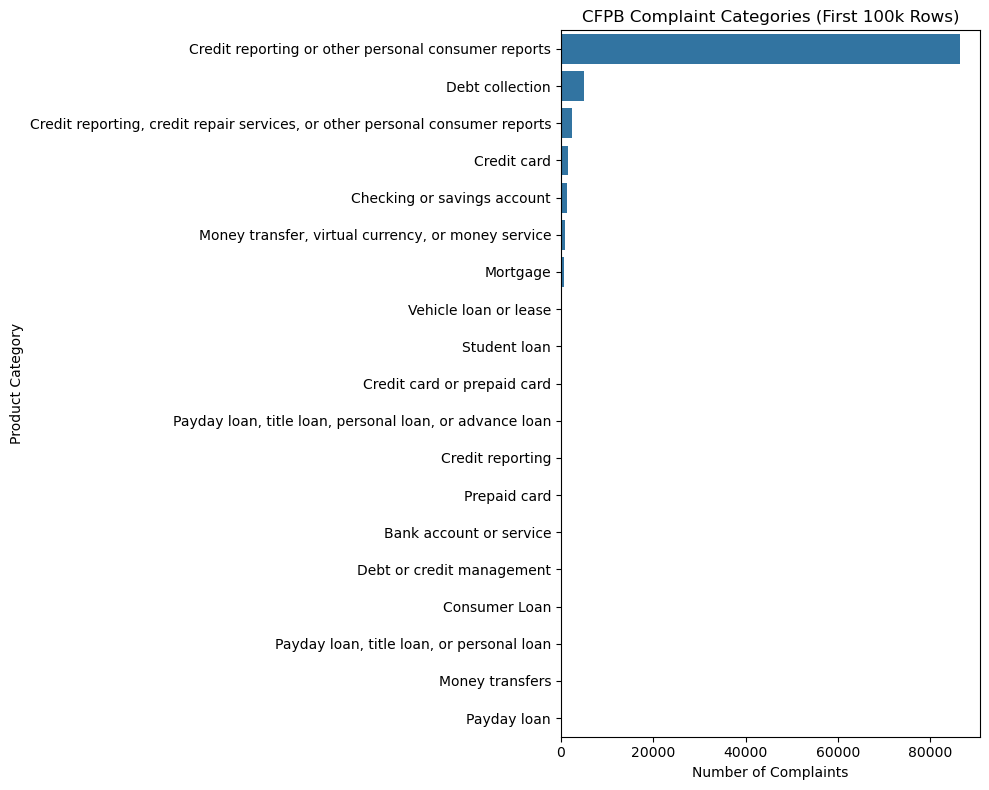

In [254]:
# Visualizing the imbalance
print("\nGenerating imbalance plot...")
plt.figure(figsize=(10, 8))
sns.countplot(y=label_column, data=df, order=df[label_column].value_counts().index)
plt.title('CFPB Complaint Categories (First 100k Rows)')
plt.xlabel('Number of Complaints')
plt.ylabel('Product Category')
plt.tight_layout()

plt.savefig('class_imbalance_plot.png')
print("Saved 'class_imbalance_plot.png'")
plt.show() 

In [256]:
# This is our feature column
feature_column = 'Consumer complaint narrative'

print(f"\nAnalyzing our feature: '{feature_column}'")

# How many complaints are missing the text?
missing_narratives = df[feature_column].isnull().sum()
print(f"Missing (NaN) narratives: {missing_narratives} ({(missing_narratives/len(df)*100):.2f}%)")

# For our model, we must drop rows where the text is missing.
df.dropna(subset=[feature_column], inplace=True)
print(f"Rows remaining after dropping missing narratives: {len(df)}")


Analyzing our feature: 'Consumer complaint narrative'
Missing (NaN) narratives: 93132 (93.13%)
Rows remaining after dropping missing narratives: 6868


count    6868.000000
mean      185.405795
std       187.960506
min         3.000000
50%       136.000000
75%       238.250000
90%       377.000000
95%       482.650000
99%       925.650000
max      4398.000000
Name: word_count, dtype: float64


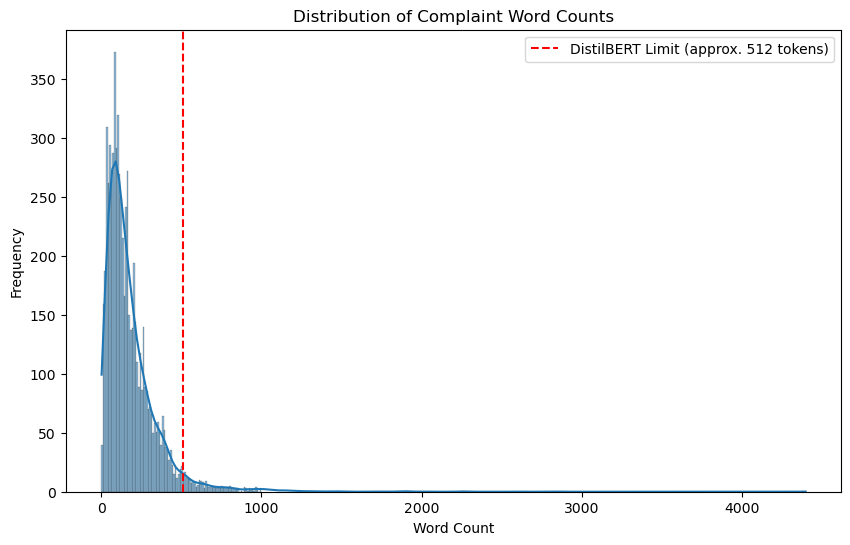

In [258]:
df['word_count'] = df['Consumer complaint narrative'].apply(lambda x: len(x.split()))

print(df['word_count'].describe(percentiles=[.5, .75, .9, .95, .99]))

plt.figure(figsize=(10, 6))

sns.histplot(df['word_count'], bins=100, kde=True, binrange=(0, 1000))
plt.title('Distribution of Complaint Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.axvline(x=512, color='red', linestyle='--', label='DistilBERT Limit (approx. 512 tokens)')
plt.legend()
plt.savefig('word_count_distribution.png')
plt.show()

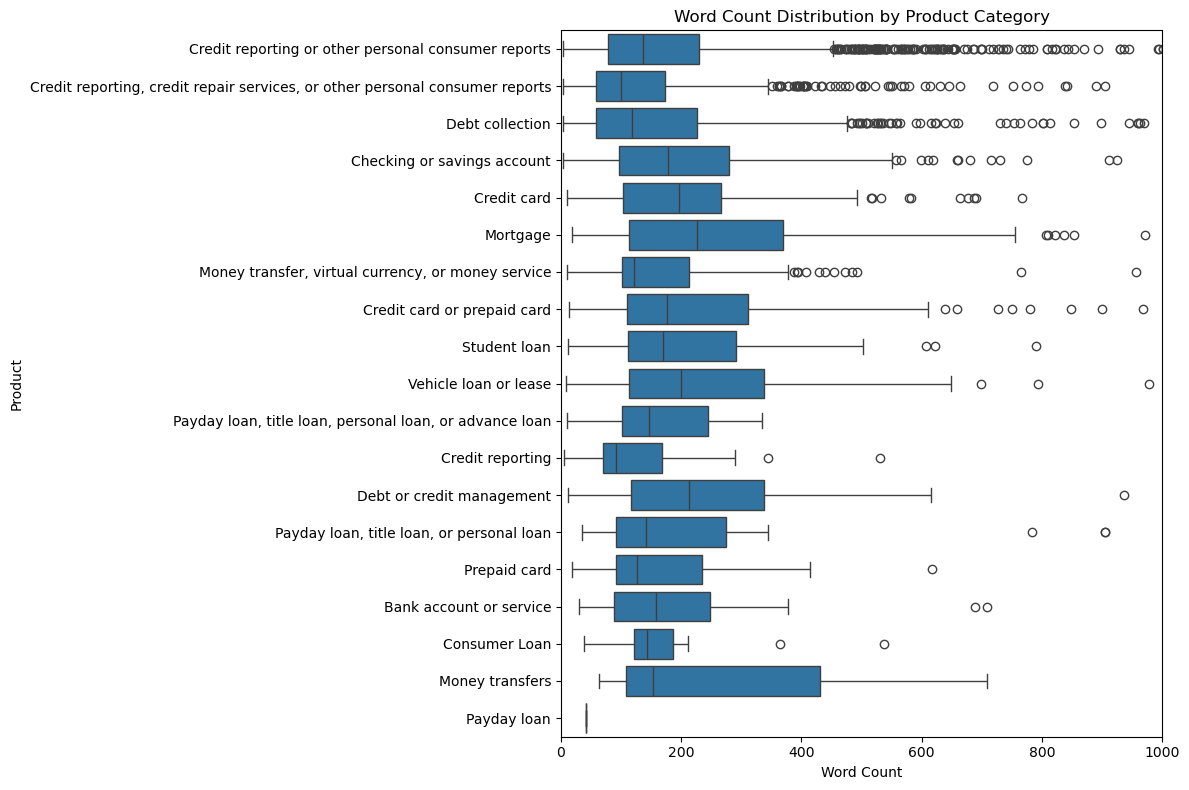

In [260]:
# Plotting word count by category
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df, 
    x='word_count', 
    y='Product', 
    order=df['Product'].value_counts().index 
)
plt.title('Word Count Distribution by Product Category')
plt.xlabel('Word Count')
plt.ylabel('Product')
plt.xlim(0, 1000) 
plt.tight_layout()
plt.savefig('word_count_by_category.png')
plt.show()

# N Grams

In [263]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=10):
    vec = CountVectorizer(stop_words='english', ngram_range=(1, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [265]:
print(df['Product'].value_counts().index.tolist())

['Credit reporting or other personal consumer reports', 'Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Checking or savings account', 'Credit card', 'Mortgage', 'Money transfer, virtual currency, or money service', 'Credit card or prepaid card', 'Student loan', 'Vehicle loan or lease', 'Payday loan, title loan, personal loan, or advance loan', 'Credit reporting', 'Debt or credit management', 'Payday loan, title loan, or personal loan', 'Prepaid card', 'Bank account or service', 'Consumer Loan', 'Money transfers', 'Payday loan']


In [267]:
# Checking top n-grams for similar categories 

categories_to_check = [
    'Credit reporting, credit repair services, or other personal consumer reports',
    'Credit reporting or other personal consumer reports',
    'Credit reporting',
    'Debt collection' 
]

print("Running N-gram analysis to compare similar categories")

for category in categories_to_check:
    print(f"\n Top N-grams for: {category}")
    
    category_text = df[df['Product'] == category]['Consumer complaint narrative']

    if category_text.empty:
        print(f"SKIPPING: No complaints found for '{category}' in this sample.")
        continue  
    
    top_terms = get_top_ngrams(category_text, n=15)
    print(top_terms)

Running N-gram analysis to compare similar categories

 Top N-grams for: Credit reporting, credit repair services, or other personal consumer reports
[('xxxx', 14133), ('xxxx xxxx', 9881), ('xx', 2193), ('credit', 1975), ('account', 1214), ('report', 1209), ('xx xx', 1075), ('information', 1020), ('reporting', 926), ('consumer', 893), ('xx xxxx', 785), ('credit report', 621), ('accounts', 550), ('section', 545), ('15', 541)]

 Top N-grams for: Credit reporting or other personal consumer reports
[('xxxx', 59914), ('xxxx xxxx', 46180), ('credit', 10708), ('report', 6517), ('xx', 6476), ('reporting', 5928), ('information', 5819), ('account', 5033), ('consumer', 5017), ('accounts', 4103), ('15', 3811), ('credit report', 3741), ('xx xx', 3120), ('fcra', 3048), ('xx xxxx', 2672)]

 Top N-grams for: Credit reporting
[('xxxx', 195), ('credit', 90), ('xxxx xxxx', 76), ('report', 39), ('information', 32), ('account', 32), ('credit report', 31), ('equifax', 21), ('reporting', 20), ('dispute', 17)

The "Credit" Categories are duplicates. All three "Credit reporting..." categories show the exact same top keywords: 'credit', 'report', 'information', 'account', and 'credit report'. This is definitive proof that they are the same category and are just labeled inconsistently in the database.

"Debt Collection" is Distinct (but related).The top keywords for Debt collection are 'debt' and 'collection'. However, it also contains the overlapping words 'credit', 'account', and 'report'. This confirms the core hypothesis of my project: Naive Bayes will likely get confused by these shared words, but a transformer (like DistilBERT) might understand the context better.

The "xxxx" Mystery is Solved The xxxx and xx tokens are clearly the most common "words." This is the CFPB's way of redacting personally identifiable information (PII) like names, account numbers, and dates. This is a critical discovery for your preprocessing step.

In [270]:
# Getting the full value counts
class_counts = df['Product'].value_counts()
print("Full class counts:")
print(class_counts)

# Finding rare classes
threshold = 100
rare_classes = class_counts[class_counts < threshold]

if len(rare_classes) > 0:
    print(f"\n--- Rare Classes (fewer than {threshold} samples) ---")
    print(rare_classes)
    print("\nRecommendation: Consider merging these into an 'Other' category or dropping them.")
else:
    print(f"\nNo classes found with fewer than {threshold} samples.")

Full class counts:
Product
Credit reporting or other personal consumer reports                             3637
Credit reporting, credit repair services, or other personal consumer reports     927
Debt collection                                                                  778
Checking or savings account                                                      356
Credit card                                                                      285
Mortgage                                                                         209
Money transfer, virtual currency, or money service                               205
Credit card or prepaid card                                                      145
Student loan                                                                      90
Vehicle loan or lease                                                             80
Payday loan, title loan, personal loan, or advance loan                           37
Credit reporting                      

Converted 'Date sent to company' to datetime object.
Resampled data by month.


C:\Users\vaiju\AppData\Local\Temp\ipykernel_14772\2508519836.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_complaints = df['Product'].resample('M').count()


Saved 'complaints_over_time.png'


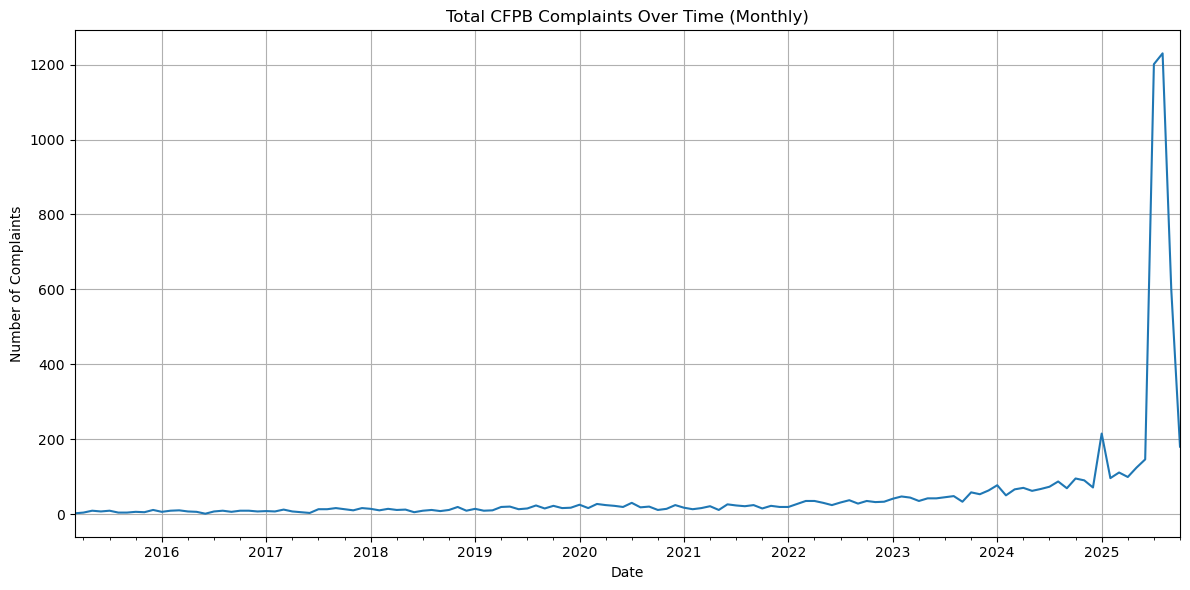

In [272]:
date_column = 'Date sent to company' 

try:
    df[date_column] = pd.to_datetime(df[date_column])
    print(f"Converted '{date_column}' to datetime object.")
except KeyError:
    print(f"Error: Column '{date_column}' not found.")
    raise

df.set_index(date_column, inplace=True)

# 'M' stands for Month
monthly_complaints = df['Product'].resample('M').count()

print("Resampled data by month.")

plt.figure(figsize=(12, 6))
monthly_complaints.plot()
plt.title('Total CFPB Complaints Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.tight_layout()
plt.savefig('complaints_over_time.png')
print("Saved 'complaints_over_time.png'")
plt.show()